In [259]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
from pathlib import Path
import gdown
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint

# import geoprofile
import micro
import gtsa

## Download sample data

In [261]:
k13_dem_folder= '/home/adalvis/github/micro_diff/data/dems/k13_results'
m14_dem_folder='/home/adalvis/github/micro_diff/data/dems/m14_results/'


k13_wsyr1_dem_files = sorted(Path(k13_dem_folder).glob('wsyr1/out/*.tif'))
k13_wsyr1_dem_files = [i.as_posix() for i in k13_wsyr1_dem_files]

k13_dsyr1_dem_files = sorted(Path(k13_dem_folder).glob('dsyr1/out/*.tif'))
k13_dsyr1_dem_files = [i.as_posix() for i in k13_dsyr1_dem_files]

k13_wsyr2_dem_files = sorted(Path(k13_dem_folder).glob('wsyr2/out/*.tif'))
k13_wsyr2_dem_files = [i.as_posix() for i in k13_wsyr2_dem_files]

m14_wsyr1_dem_files = sorted(Path(m14_dem_folder).glob('wsyr1/out/*.tif'))
m14_wsyr1_dem_files = [i.as_posix() for i in m14_wsyr1_dem_files]

m14_dsyr1_dem_files = sorted(Path(m14_dem_folder).glob('dsyr1/out/*.tif'))
m14_dsyr1_dem_files = [i.as_posix() for i in m14_dsyr1_dem_files]

m14_wsyr2_dem_files = sorted(Path(m14_dem_folder).glob('wsyr2/out/*.tif'))
m14_wsyr2_dem_files = [i.as_posix() for i in m14_wsyr2_dem_files]

In [262]:
k13_wsyr1_dem_files, k13_dsyr1_dem_files, k13_wsyr2_dem_files, \
m14_wsyr1_dem_files, m14_dsyr1_dem_files, m14_wsyr2_dem_files

(['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_202205

## Parse time stamps

#### KID-13 WSYR1

In [263]:
strings_k13_wsyr1 = gtsa.io.parse_timestamps(k13_wsyr1_dem_files, date_string_pattern='_........_')
date_strings_k13_wsyr1 = [x[1:-1] for x in strings_k13_wsyr1]

# ensure chronological sorting
date_strings_k13_wsyr1, k13_wsyr1_dem_files = list(zip(*sorted(zip(date_strings_k13_wsyr1, k13_wsyr1_dem_files))))
date_times_k13_wsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr1]

list(zip(date_strings_k13_wsyr1, k13_wsyr1_dem_files))

[('20201109',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.tif'),
 ('20210208',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.tif'),
 ('20210406',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.tif'),
 ('20210513',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.tif')]

#### KID-13 DSYR1

In [264]:
strings_k13_dsyr1 = gtsa.io.parse_timestamps(k13_dsyr1_dem_files, date_string_pattern='_........_')
date_strings_k13_dsyr1 = [x[1:-1] for x in strings_k13_dsyr1]

# ensure chronological sorting
date_strings_k13_dsyr1, k13_dsyr1_dem_files = list(zip(*sorted(zip(date_strings_k13_dsyr1, k13_dsyr1_dem_files))))
date_times_k13_dsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_dsyr1]

list(zip(date_strings_k13_dsyr1, k13_dsyr1_dem_files))

[('20210604',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.tif'),
 ('20210819',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.tif'),
 ('20210913',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.tif')]

#### KID-13 WSYR2

In [265]:
strings_k13_wsyr2 = gtsa.io.parse_timestamps(k13_wsyr2_dem_files, date_string_pattern='_........_')
date_strings_k13_wsyr2 = [x[1:-1] for x in strings_k13_wsyr2]

# ensure chronological sorting
date_strings_k13_wsyr2, k13_wsyr2_dem_files = list(zip(*sorted(zip(date_strings_k13_wsyr2, k13_wsyr2_dem_files))))
date_times_k13_wsyr2 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr2]

list(zip(date_strings_k13_wsyr2, k13_wsyr2_dem_files))

[('20211007',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.tif'),
 ('20220208',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.tif'),
 ('20220503',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220503_sfm_drainage.tif'),
 ('20220531',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_sfm_drainage.tif')]

#### MEL-14 WSYR1

In [266]:
strings_m14_wsyr1 = gtsa.io.parse_timestamps(m14_wsyr1_dem_files, date_string_pattern='_........_')
date_strings_m14_wsyr1 = [x[1:-1] for x in strings_m14_wsyr1]

# ensure chronological sorting
date_strings_m14_wsyr1, m14_wsyr1_dem_files = list(zip(*sorted(zip(date_strings_m14_wsyr1, m14_wsyr1_dem_files))))
date_times_m14_wsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr1]

list(zip(date_strings_m14_wsyr1, m14_wsyr1_dem_files))

[('20201203',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20201203_sfm_drainage.tif'),
 ('20210224',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20210224_sfm_drainage.tif')]

#### MEL-14 DSYR1

In [267]:
strings_m14_dsyr1 = gtsa.io.parse_timestamps(m14_dsyr1_dem_files, date_string_pattern='_........_')
date_strings_m14_dsyr1 = [x[1:-1] for x in strings_m14_dsyr1]

# ensure chronological sorting
date_strings_m14_dsyr1, m14_dsyr1_dem_files = list(zip(*sorted(zip(date_strings_m14_dsyr1, m14_dsyr1_dem_files))))
date_times_m14_dsyr1 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_dsyr1]

list(zip(date_strings_m14_dsyr1, m14_dsyr1_dem_files))

[('20210603',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210603_sfm_drainage.tif'),
 ('20210914',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210914_sfm_drainage.tif')]

#### MEL-14 WSYR2

In [268]:
strings_m14_wsyr2 = gtsa.io.parse_timestamps(m14_wsyr2_dem_files, date_string_pattern='_........_')
date_strings_m14_wsyr2 = [x[1:-1] for x in strings_m14_wsyr2]

# ensure chronological sorting
date_strings_m14_wsyr2, m14_wsyr2_dem_files = list(zip(*sorted(zip(date_strings_m14_wsyr2, m14_wsyr2_dem_files))))
date_times_m14_wsyr2 = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2]

list(zip(date_strings_m14_wsyr2, m14_wsyr2_dem_files))

[('20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220309_sfm_drainage.tif'),
 ('20220316',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220316_sfm_drainage.tif'),
 ('20220324',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220324_sfm_drainage.tif'),
 ('20220411',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220411_sfm_drainage.tif'),
 ('20220428',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220428_sfm_drainage.tif'),
 ('20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220601_sfm_drainage.tif')]

In [269]:
import glob
import os

from osgeo import gdal
import numpy as np

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds


# MEL-14
os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

## Read & open DEMs

In [270]:
k13_mask_path = '/home/adalvis/github/micro_diff/data/vectors/kid_mask/west_boundary_k13.shp'
# grab shapefile crs to write to rasters
k13_crs = gpd.read_file(k13_mask_path).crs
k13_mask_gdf = gpd.read_file(k13_mask_path)

m14_mask_path = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/west_boundary_m14.shp'
# grab shapefile crs to write to rasters
m14_crs = gpd.read_file(m14_mask_path).crs
m14_mask_gdf = gpd.read_file(m14_mask_path)

In [271]:
#Wet season year 1
k13_wsyr1 = dict()
for i in range(len(k13_wsyr1_dem_files)):
    k13_wsyr1[i] = rio.open_rasterio(k13_wsyr1_dem_files[i]).squeeze()
    k13_wsyr1[i].rio.write_crs(k13_crs, inplace=True)

#Dry season year 1
k13_dsyr1 = dict()
for i in range(len(k13_dsyr1_dem_files)):
    k13_dsyr1[i] = rio.open_rasterio(k13_dsyr1_dem_files[i]).squeeze()
    k13_dsyr1[i].rio.write_crs(k13_crs, inplace=True)

#Wet season year 2
k13_wsyr2 = dict()
for i in range(len(k13_wsyr2_dem_files)):
    k13_wsyr2[i] = rio.open_rasterio(k13_wsyr2_dem_files[i]).squeeze()
    k13_wsyr2[i].rio.write_crs(k13_crs, inplace=True)

In [272]:
#Wet season year 1
m14_wsyr1 = dict()
for i in range(len(m14_wsyr1_dem_files)):
    m14_wsyr1[i] = rio.open_rasterio(m14_wsyr1_dem_files[i]).squeeze()
    m14_wsyr1[i].rio.write_crs(m14_crs, inplace=True)

#Dry season year 1
m14_dsyr1 = dict()
for i in range(len(m14_dsyr1_dem_files)):
    m14_dsyr1[i] = rio.open_rasterio(m14_dsyr1_dem_files[i]).squeeze()
    m14_dsyr1[i].rio.write_crs(m14_crs, inplace=True)

#Wet season year 2
m14_wsyr2 = dict()
for i in range(len(m14_wsyr2_dem_files)):
    m14_wsyr2[i] = rio.open_rasterio(m14_wsyr2_dem_files[i]).squeeze()
    m14_wsyr2[i].rio.write_crs(m14_crs, inplace=True)

## Plot edge drainage

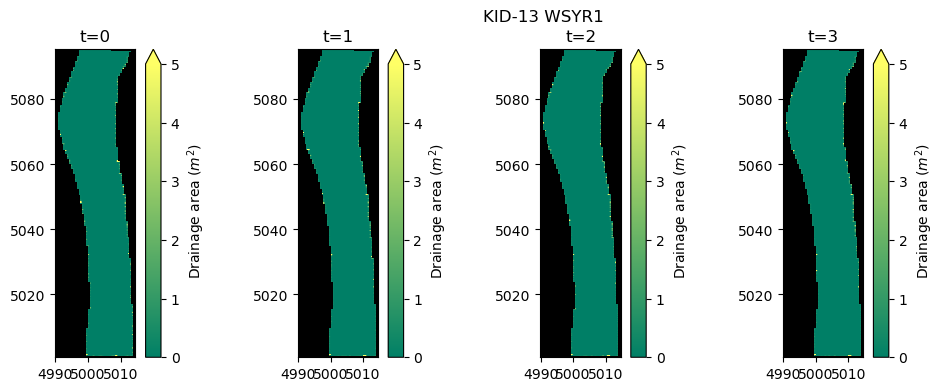

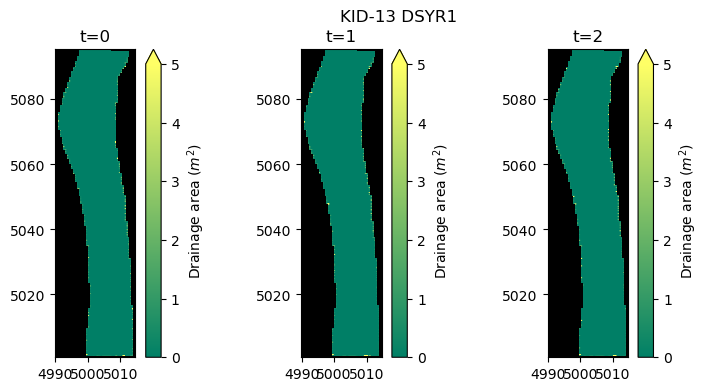

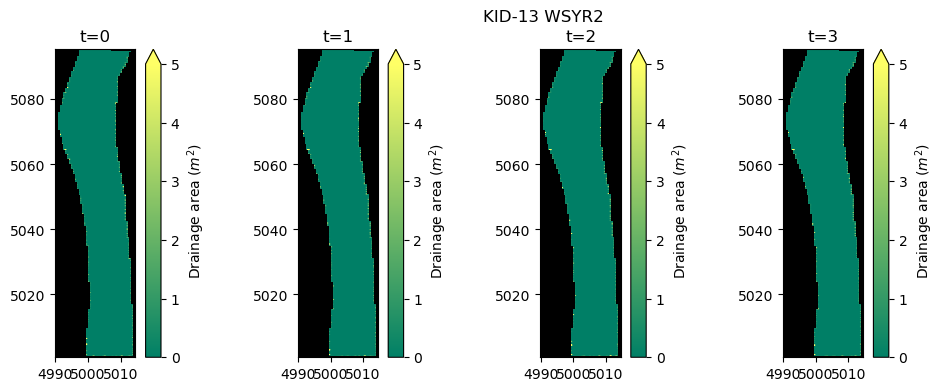

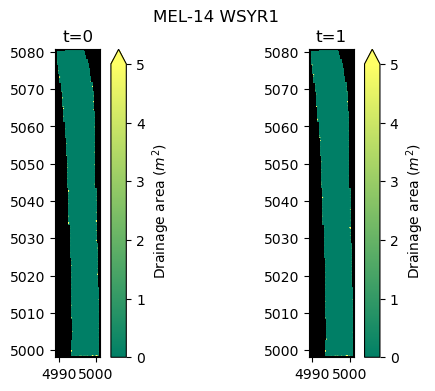

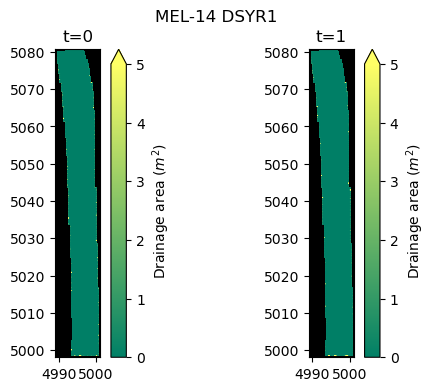

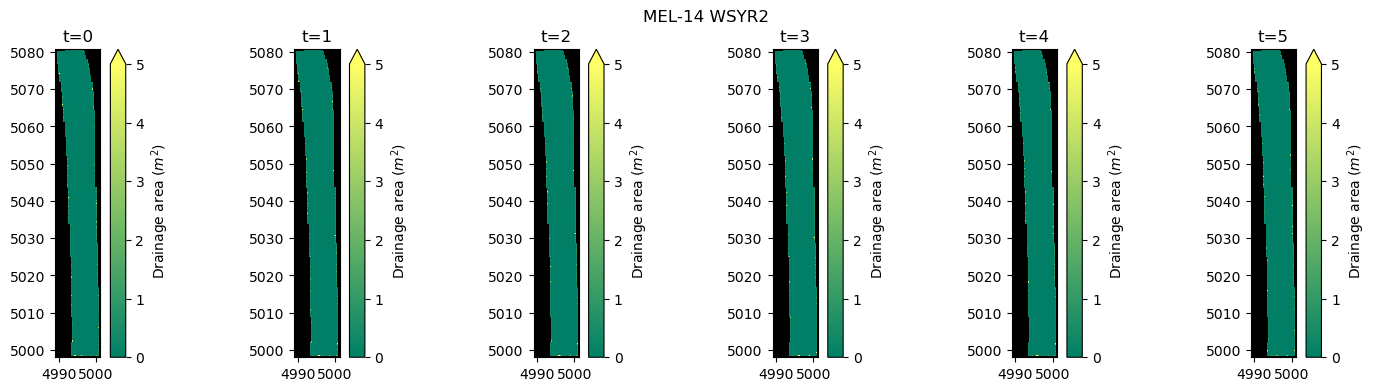

In [273]:
extent = k13_wsyr1[0].rio.bounds()

fig0, ax = plt.subplots(1, 4, figsize=(12,4))
fig0.suptitle('KID-13 WSYR1', x=0.6)
for i in range(len(k13_wsyr1_dem_files)):
    m0 = ax[i].imshow(k13_wsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_wsyr1[i].rio.bounds())
    ax[i].set_title('t=%i' %i)
    fig0.colorbar(m0, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
    ax[i].set_facecolor('k')
    # ax[i].set_xticks(())
    # ax[i].set_yticks(());

fig1, ax = plt.subplots(1, 3, figsize=(9,4))
fig1.suptitle('KID-13 DSYR1', x=0.6)
for i in range(len(k13_dsyr1_dem_files)):
    m1 = ax[i].imshow(k13_dsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_dsyr1[i].rio.bounds())
    ax[i].set_title('t=%i' %i)
    fig1.colorbar(m1, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
    ax[i].set_facecolor('k')
    # ax[i].set_xticks(())
    # ax[i].set_yticks(());

fig2, ax = plt.subplots(1, 4, figsize=(12,4))
fig2.suptitle('KID-13 WSYR2', x=0.6)
for i in range(len(k13_wsyr2_dem_files)):
    m2 = ax[i].imshow(k13_wsyr2[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_wsyr2[i].rio.bounds())
    ax[i].set_title('t=%i' %i)
    fig2.colorbar(m2, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
    ax[i].set_facecolor('k')
    # ax[i].set_xticks(())
    # ax[i].set_yticks(());



fig3, ax = plt.subplots(1, 2, figsize=(6,4))
fig3.suptitle('MEL-14 WSYR1', x=0.6)
for i in range(len(m14_wsyr1_dem_files)):
    m3 = ax[i].imshow(m14_wsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_wsyr1[i].rio.bounds())
    ax[i].set_title('t=%i' %i)
    fig3.colorbar(m3, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
    ax[i].set_facecolor('k')
    # ax[i].set_xticks(())
    # ax[i].set_yticks(());

fig4, ax = plt.subplots(1, 2, figsize=(6,4))
fig4.suptitle('MEL-14 DSYR1', x=0.6)
for i in range(len(m14_dsyr1_dem_files)):
    m4 = ax[i].imshow(m14_dsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_dsyr1[i].rio.bounds())
    ax[i].set_title('t=%i' %i)
    fig4.colorbar(m4, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
    ax[i].set_facecolor('k')
    # ax[i].set_xticks(())
    # ax[i].set_yticks(());

fig5, ax = plt.subplots(1, 6, figsize=(18,4))
fig5.suptitle('MEL-14 WSYR2', x=0.55)
for i in range(len(m14_wsyr2_dem_files)):
    m5 = ax[i].imshow(m14_wsyr2[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_wsyr2[i].rio.bounds())
    ax[i].set_title('t=%i' %i)
    fig5.colorbar(m5, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
    ax[i].set_facecolor('k')
    # ax[i].set_xticks(())
    # ax[i].set_yticks(());


In [274]:
t_k13_wsyr1 = [0, 3, 5, 6]
cm_norm_k13_wsyr1 = np.zeros(len(k13_wsyr1_dem_files))
cm_wa_k13_wsyr1 = np.zeros(len(k13_wsyr1_dem_files))
for i in range(len(k13_wsyr1_dem_files)):
    cm_norm_k13_wsyr1[i] = np.sum(k13_wsyr1[i]['y']*np.sum(~np.isnan(k13_wsyr1[i]), axis =1))/np.sum(~np.isnan(k13_wsyr1[i]))
    cm_wa_k13_wsyr1[i] = np.sum(k13_wsyr1[i]['y']*np.sum(k13_wsyr1[i], axis=1))/np.sum(k13_wsyr1[i])

t_k13_dsyr1 = [0, 2.5, 3.5]
cm_norm_k13_dsyr1 = np.zeros(len(k13_dsyr1_dem_files))
cm_wa_k13_dsyr1 = np.zeros(len(k13_dsyr1_dem_files))
for i in range(len(k13_dsyr1_dem_files)):
    cm_norm_k13_dsyr1[i] = np.sum(k13_dsyr1[i]['y']*np.sum(~np.isnan(k13_dsyr1[i]), axis =1))/np.sum(~np.isnan(k13_dsyr1[i]))
    cm_wa_k13_dsyr1[i] = np.sum(k13_dsyr1[i]['y']*np.sum(k13_dsyr1[i], axis=1))/np.sum(k13_dsyr1[i])

t_k13_wsyr2 = [0,4,7,8]
cm_norm_k13_wsyr2 = np.zeros(len(k13_wsyr2_dem_files))
cm_wa_k13_wsyr2 = np.zeros(len(k13_wsyr2_dem_files))
for i in range(len(k13_wsyr2_dem_files)):
    cm_norm_k13_wsyr2[i] = np.sum(k13_wsyr2[i]['y']*np.sum(~np.isnan(k13_wsyr2[i]), axis =1))/np.sum(~np.isnan(k13_wsyr2[i]))
    cm_wa_k13_wsyr2[i] = np.sum(k13_wsyr2[i]['y']*np.sum(k13_wsyr2[i], axis=1))/np.sum(k13_wsyr2[i])

In [275]:
cm_wa_k13_wsyr2

array([5054.90199052, 5054.68266898, 5054.57162182, 5054.61871239])

In [276]:
cm_norm_k13_wsyr1 = (cm_norm_k13_wsyr1-min(k13_wsyr2[i]['y'].values))/(max(k13_wsyr2[i]['y'].values)-min(k13_wsyr2[i]['y'].values))
cm_wa_k13_wsyr1 = (cm_wa_k13_wsyr1-min(k13_wsyr2[i]['y'].values))/(max(k13_wsyr2[i]['y'].values)-min(k13_wsyr2[i]['y'].values))
cm_norm_k13_dsyr1 = (cm_norm_k13_dsyr1-min(k13_wsyr2[i]['y'].values))/(max(k13_wsyr2[i]['y'].values)-min(k13_wsyr2[i]['y'].values))
cm_wa_k13_dsyr1 = (cm_wa_k13_dsyr1-min(k13_wsyr2[i]['y'].values))/(max(k13_wsyr2[i]['y'].values)-min(k13_wsyr2[i]['y'].values))
cm_norm_k13_wsyr2 = (cm_norm_k13_wsyr2-min(k13_wsyr2[i]['y'].values))/(max(k13_wsyr2[i]['y'].values)-min(k13_wsyr2[i]['y'].values))
cm_wa_k13_wsyr2 = (cm_wa_k13_wsyr2-min(k13_wsyr2[i]['y'].values))/(max(k13_wsyr2[i]['y'].values)-min(k13_wsyr2[i]['y'].values))

tmax_k13_wsyr1 = np.linspace(-0.25,8.25, 4)

In [278]:
t_m14_wsyr1 = [0, 2.5]
cm_norm_m14_wsyr1 = np.zeros(len(m14_wsyr1_dem_files))
cm_wa_m14_wsyr1 = np.zeros(len(m14_wsyr1_dem_files))
for i in range(len(m14_wsyr1_dem_files)):
    cm_norm_m14_wsyr1[i] = np.sum(m14_wsyr1[i]['y']*np.sum(~np.isnan(m14_wsyr1[i]), axis =1))/np.sum(~np.isnan(m14_wsyr1[i]))
    cm_wa_m14_wsyr1[i] = np.sum(m14_wsyr1[i]['y']*np.sum(m14_wsyr1[i], axis=1))/np.sum(m14_wsyr1[i])

t_m14_dsyr1 = [0, 3.5]
cm_norm_m14_dsyr1 = np.zeros(len(m14_dsyr1_dem_files))
cm_wa_m14_dsyr1 = np.zeros(len(m14_dsyr1_dem_files))
for i in range(len(m14_dsyr1_dem_files)):
    cm_norm_m14_dsyr1[i] = np.sum(m14_dsyr1[i]['y']*np.sum(~np.isnan(m14_dsyr1[i]), axis =1))/np.sum(~np.isnan(m14_dsyr1[i]))
    cm_wa_m14_dsyr1[i] = np.sum(m14_dsyr1[i]['y']*np.sum(m14_dsyr1[i], axis=1))/np.sum(m14_dsyr1[i])

t_m14_wsyr2 = [0,0.25,0.5,1,1.75,3]
cm_norm_m14_wsyr2 = np.zeros(len(m14_wsyr2_dem_files))
cm_wa_m14_wsyr2 = np.zeros(len(m14_wsyr2_dem_files))
for i in range(len(m14_wsyr2_dem_files)):
    cm_norm_m14_wsyr2[i] = np.sum(m14_wsyr2[i]['y']*np.sum(~np.isnan(m14_wsyr2[i]), axis =1))/np.sum(~np.isnan(m14_wsyr2[i]))
    cm_wa_m14_wsyr2[i] = np.sum(m14_wsyr2[i]['y']*np.sum(m14_wsyr2[i], axis=1))/np.sum(m14_wsyr2[i])

In [279]:
cm_norm_m14_wsyr1 = (cm_norm_m14_wsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_wa_m14_wsyr1 = (cm_wa_m14_wsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_norm_m14_dsyr1 = (cm_norm_m14_dsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_wa_m14_dsyr1 = (cm_wa_m14_dsyr1-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_norm_m14_wsyr2 = (cm_norm_m14_wsyr2-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))
cm_wa_m14_wsyr2 = (cm_wa_m14_wsyr2-min(m14_wsyr2[i]['y'].values))/(max(m14_wsyr2[i]['y'].values)-min(m14_wsyr2[i]['y'].values))

tmax_m14_wsyr1 = np.linspace(-0.25,3.75, 2)

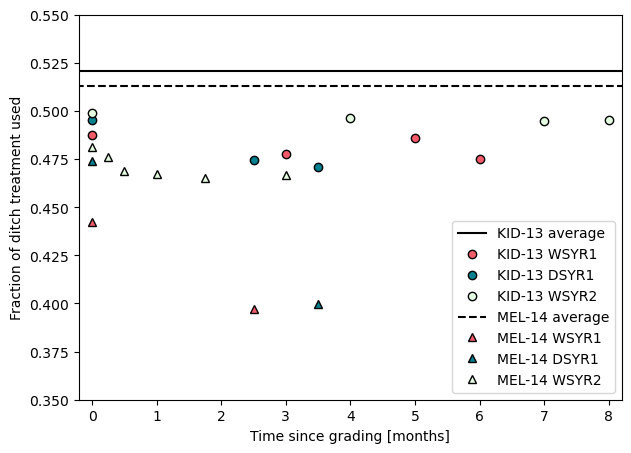

In [310]:
tmax_m14_wsyr1 = np.linspace(-0.25,8.25, 2)
fig, ax =plt.subplots(figsize=(7,5))

ax.plot(tmax_k13_wsyr1, cm_norm_k13_wsyr1, color='k', label='KID-13 average')
ax.plot(t_k13_wsyr1, cm_wa_k13_wsyr1, 'o', color='#F45B69', markeredgecolor='k', label='KID-13 WSYR1')
ax.plot(t_k13_dsyr1, cm_wa_k13_dsyr1, 'o', color='#028090', markeredgecolor='k', label='KID-13 DSYR1')
ax.plot(t_k13_wsyr2, cm_wa_k13_wsyr2, 'o', color='#E4FDE1', markeredgecolor='k', label='KID-13 WSYR2')

ax.plot(tmax_m14_wsyr1, cm_norm_m14_wsyr1,'--', color='k', label='MEL-14 average')
ax.plot(t_m14_wsyr1, cm_wa_m14_wsyr1, '^', color='#F45B69', markeredgecolor='k', label='MEL-14 WSYR1')
ax.plot(t_m14_dsyr1, cm_wa_m14_dsyr1, '^', color='#028090', markeredgecolor='k', label='MEL-14 DSYR1')
ax.plot(t_m14_wsyr2, cm_wa_m14_wsyr2, '^', color='#E4FDE1', markeredgecolor='k', label='MEL-14 WSYR2')
ax.set(xlabel='Time since grading [months]',ylabel='Fraction of ditch treatment used',\
    xlim=(-0.2,8.2), ylim=(0.35,0.55))
ax.legend()
plt.show();

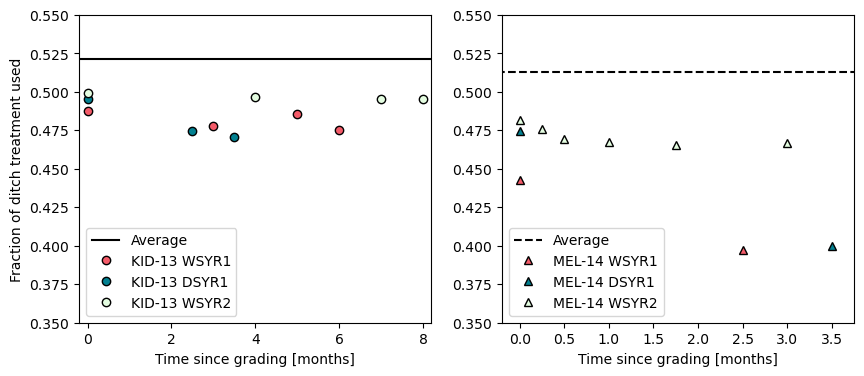

In [311]:
fig, ax =plt.subplots(1,2, figsize=(10,4))

ax[0].plot(tmax_k13_wsyr1, cm_norm_k13_wsyr1, color='k', label='Average')
ax[0].plot(t_k13_wsyr1, cm_wa_k13_wsyr1, 'o', color='#F45B69', markeredgecolor='k', label='KID-13 WSYR1')
ax[0].plot(t_k13_dsyr1, cm_wa_k13_dsyr1, 'o', color='#028090', markeredgecolor='k', label='KID-13 DSYR1')
ax[0].plot(t_k13_wsyr2, cm_wa_k13_wsyr2, 'o', color='#E4FDE1', markeredgecolor='k', label='KID-13 WSYR2')
ax[0].set_ylabel('Fraction of ditch treatment used')
ax[0].set_xlim(-0.2,8.2)


tmax_m14_wsyr1 = np.linspace(-0.25,3.75, 2)
ax[1].plot(tmax_m14_wsyr1, cm_norm_m14_wsyr1, '--', color='k', label='Average')
ax[1].plot(t_m14_wsyr1, cm_wa_m14_wsyr1, '^', color='#F45B69', markeredgecolor='k', label='MEL-14 WSYR1')
ax[1].plot(t_m14_dsyr1, cm_wa_m14_dsyr1, '^', color='#028090', markeredgecolor='k', label='MEL-14 DSYR1')
ax[1].plot(t_m14_wsyr2, cm_wa_m14_wsyr2, '^', color='#E4FDE1', markeredgecolor='k', label='MEL-14 WSYR2')
ax[1].set_xlim(-0.2,3.75)


for ax in ax.flat:
    ax.set(xlabel='Time since grading [months]',\
         ylim=(0.35,0.55))
    ax.legend()
plt.show();

In [281]:
k13_west = '/home/adalvis/github/micro_diff/data/vectors/kid_mask/west_boundary_k13_fixed.shp'
k13_south = '/home/adalvis/github/micro_diff/data/vectors/kid_mask/south_boundary_k13.shp'
k13_east = '/home/adalvis/github/micro_diff/data/vectors/kid_mask/east_boundary_k13_fixed.shp'

# grab shapefile crs to write to rasters
k13_crs = gpd.read_file(k13_mask_path).crs
k13_west_gdf = gpd.read_file(k13_west)
k13_south_gdf = gpd.read_file(k13_south)
k13_east_gdf = gpd.read_file(k13_east)


k13_wsyr1_west = dict()
k13_wsyr1_south = dict()
k13_wsyr1_east = dict()
for i in range(len(k13_wsyr1_dem_files)):
    k13_wsyr1_west[i] = k13_wsyr1[i].rio.clip(k13_west_gdf.geometry)
    k13_wsyr1_south[i] = k13_wsyr1[i].rio.clip(k13_south_gdf.geometry)
    k13_wsyr1_east[i] = k13_wsyr1[i].rio.clip(k13_east_gdf.geometry)

k13_dsyr1_west = dict()
k13_dsyr1_south = dict()
k13_dsyr1_east = dict()
for i in range(len(k13_dsyr1_dem_files)):
    k13_dsyr1_west[i] = k13_dsyr1[i].rio.clip(k13_west_gdf.geometry)
    k13_dsyr1_south[i] = k13_dsyr1[i].rio.clip(k13_south_gdf.geometry)
    k13_dsyr1_east[i] = k13_dsyr1[i].rio.clip(k13_east_gdf.geometry)

k13_wsyr2_west = dict()
k13_wsyr2_south = dict()
k13_wsyr2_east = dict()
for i in range(len(k13_wsyr2_dem_files)):
    k13_wsyr2_west[i] = k13_wsyr2[i].rio.clip(k13_west_gdf.geometry)
    k13_wsyr2_south[i] = k13_wsyr2[i].rio.clip(k13_south_gdf.geometry)
    k13_wsyr2_east[i] = k13_wsyr2[i].rio.clip(k13_east_gdf.geometry)


In [282]:
m14_west_yr1 = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/west_boundary_m14_fixed1.shp'
m14_west_yr2 = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/west_boundary_m14_fixed2.shp'
m14_south = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/south_boundary_m14.shp'
m14_east = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/east_boundary_m14_fixed.shp'

# grab shapefile crs to write to rasters
m14_crs = gpd.read_file(m14_mask_path).crs
m14_west_gdf_yr1 = gpd.read_file(m14_west_yr1)
m14_west_gdf_yr2 = gpd.read_file(m14_west_yr2)
m14_south_gdf = gpd.read_file(m14_south)
m14_east_gdf = gpd.read_file(m14_east)


m14_wsyr1_west = dict()
m14_wsyr1_south = dict()
m14_wsyr1_east = dict()
for i in range(len(m14_wsyr1_dem_files)):
    m14_wsyr1_west[i] = m14_wsyr1[i].rio.clip(m14_west_gdf_yr1.geometry)
    m14_wsyr1_south[i] = m14_wsyr1[i].rio.clip(m14_south_gdf.geometry)
    m14_wsyr1_east[i] = m14_wsyr1[i].rio.clip(m14_east_gdf.geometry)

m14_dsyr1_west = dict()
m14_dsyr1_south = dict()
m14_dsyr1_east = dict()
for i in range(len(m14_dsyr1_dem_files)):
    m14_dsyr1_west[i] = m14_dsyr1[i].rio.clip(m14_west_gdf_yr1.geometry)
    m14_dsyr1_south[i] = m14_dsyr1[i].rio.clip(m14_south_gdf.geometry)
    m14_dsyr1_east[i] = m14_dsyr1[i].rio.clip(m14_east_gdf.geometry)

m14_wsyr2_west = dict()
m14_wsyr2_south = dict()
m14_wsyr2_east = dict()
for i in range(len(m14_wsyr2_dem_files)):
    m14_wsyr2_west[i] = m14_wsyr2[i].rio.clip(m14_west_gdf_yr2.geometry)
    m14_wsyr2_south[i] = m14_wsyr2[i].rio.clip(m14_south_gdf.geometry)
    m14_wsyr2_east[i] = m14_wsyr2[i].rio.clip(m14_east_gdf.geometry)

In [283]:
df = pd.DataFrame(m14_wsyr1_west[0])

In [284]:
# pd.set_option('display.max_rows', None)
# df

In [285]:
np.sum(k13_dsyr1_west[0]['y']*k13_dsyr1_west[0].values[~np.isnan(k13_dsyr1_west[0])])/np.sum(k13_dsyr1_west[0].values[~np.isnan(k13_dsyr1_west[0])])

<xarray.DataArray 'y' ()> Size: 8B
array(5052.32956108)
Coordinates:
    band         int64 8B 1
    spatial_ref  int64 8B 0

In [286]:
k13_dsyr1_west[0]['y']

<xarray.DataArray 'y' (y: 321)> Size: 3kB
array([5094.97498, 5094.72498, 5094.47498, ..., 5015.47498, 5015.22498,
       5014.97498])
Coordinates:
    band         int64 8B 1
  * y            (y) float64 3kB 5.095e+03 5.095e+03 ... 5.015e+03 5.015e+03
    spatial_ref  int64 8B 0
Attributes:
    axis:           Y
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north

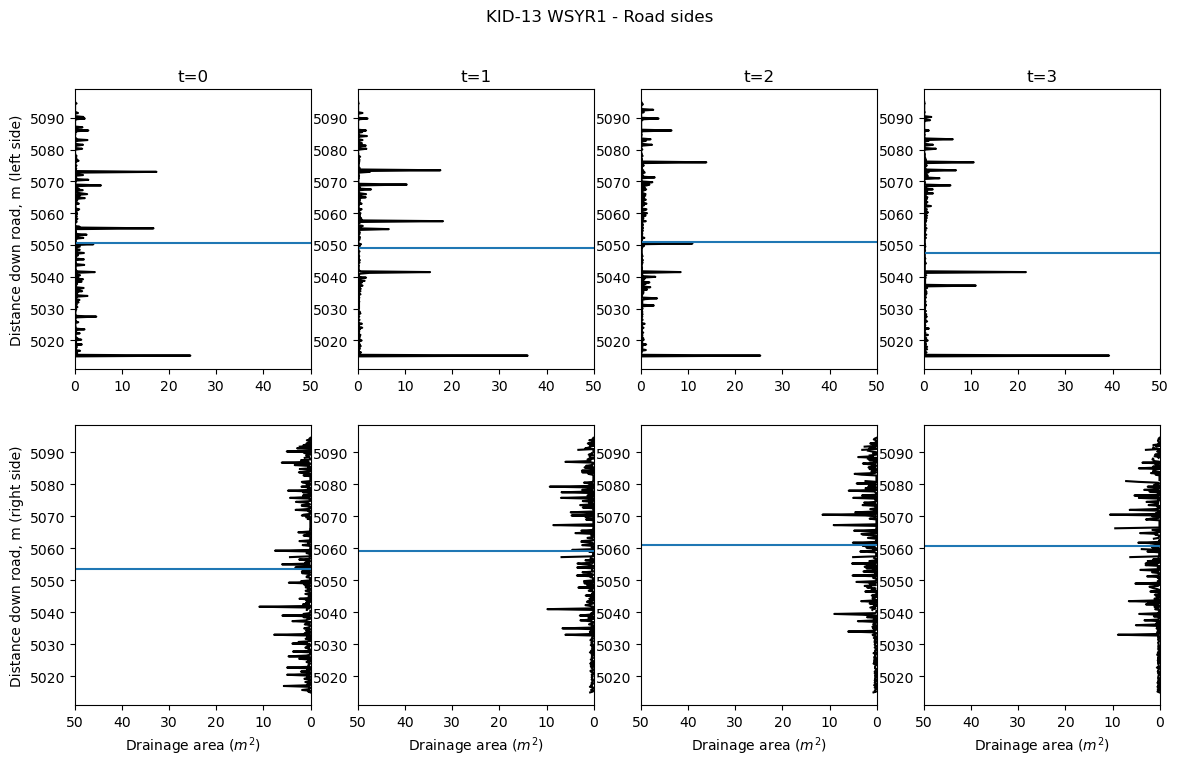

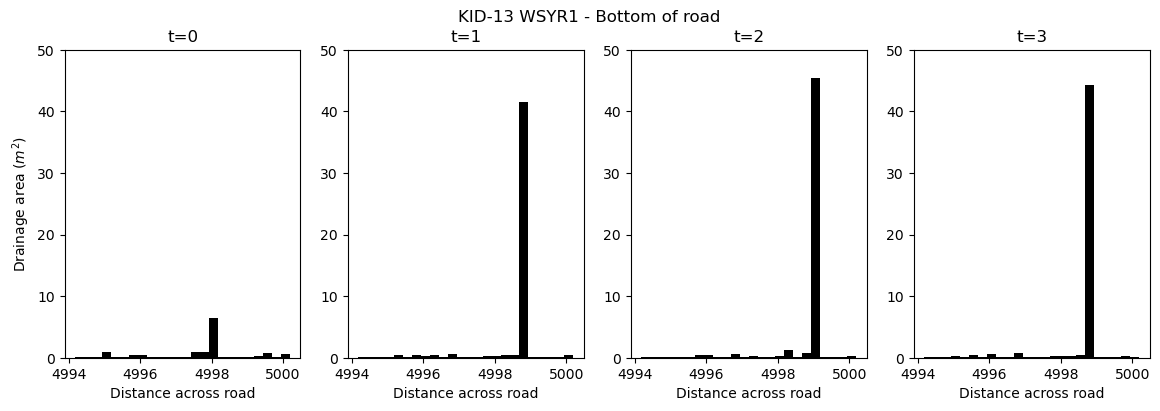

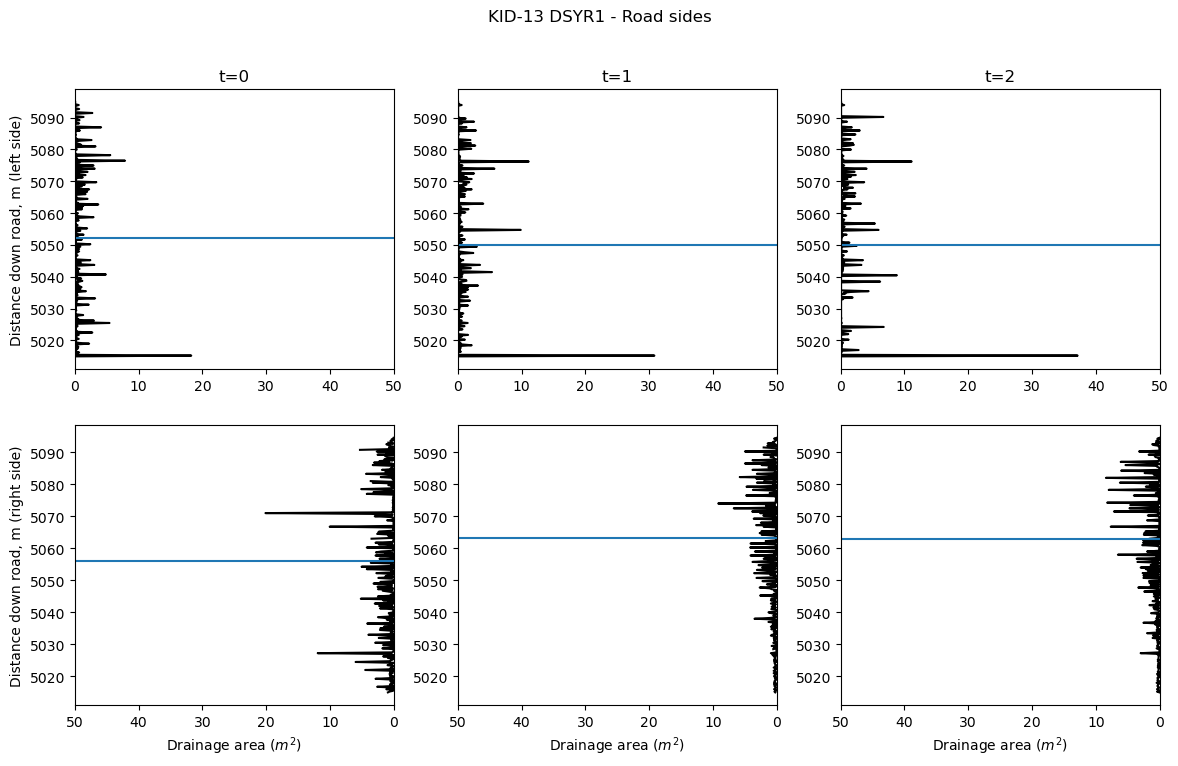

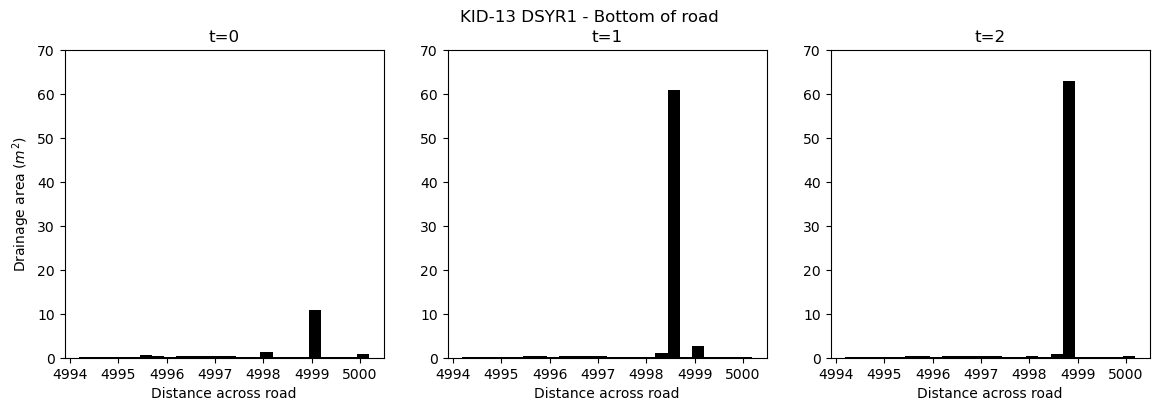

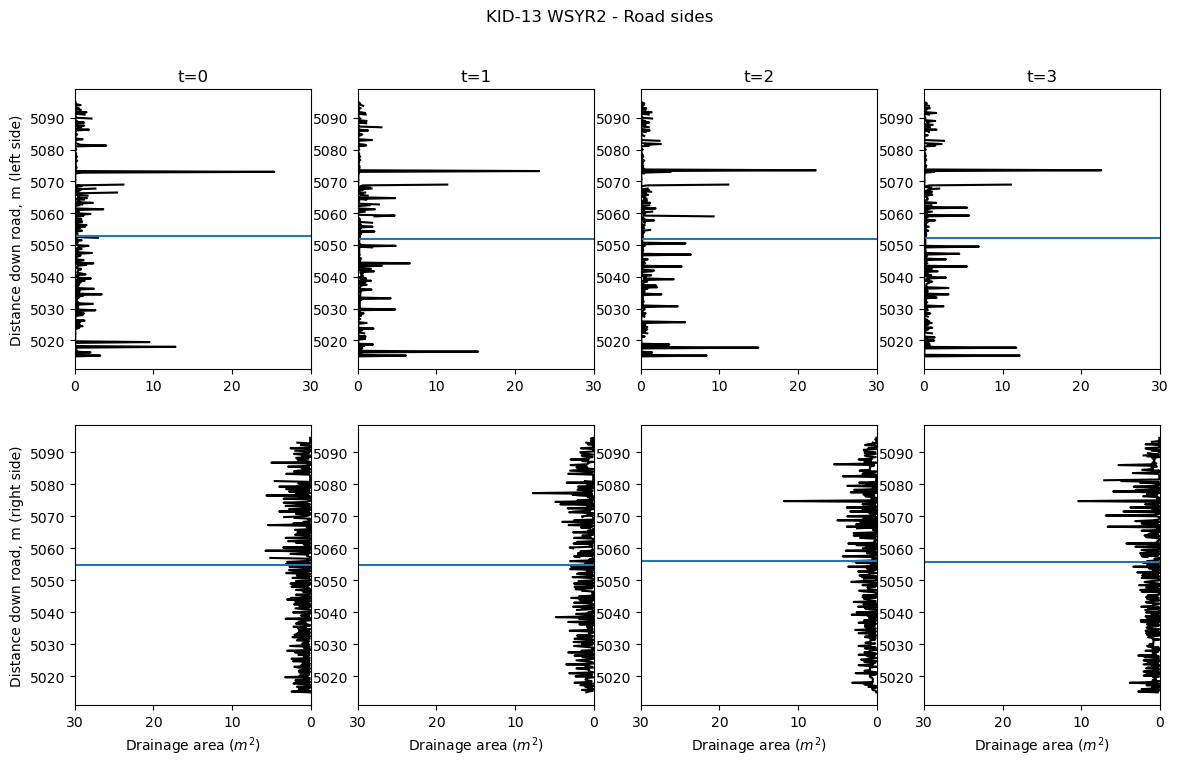

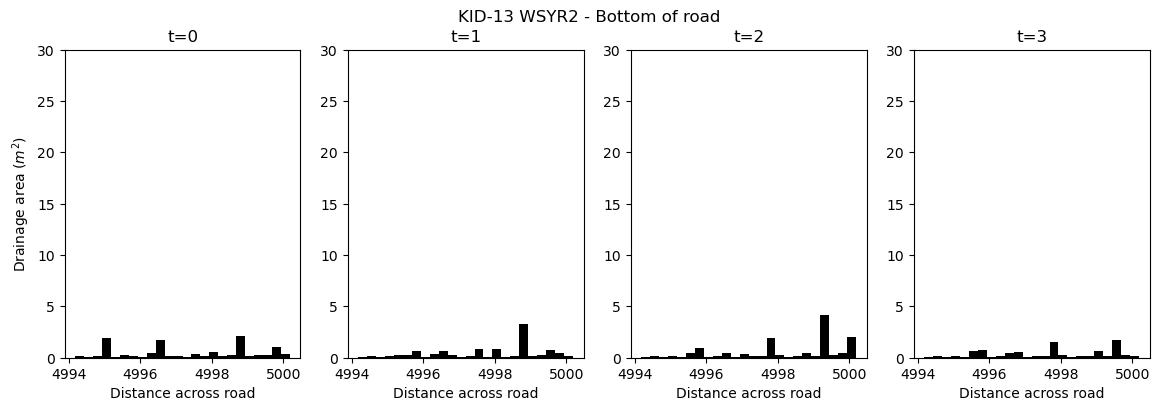

In [287]:
#WSYR1
fig0, ax = plt.subplots(2, 4, figsize=(14,8))
fig0.suptitle('KID-13 WSYR1 - Road sides', x=0.5)
cgx_w = np.zeros(len(k13_wsyr1_dem_files))
cgx_e = np.zeros(len(k13_wsyr1_dem_files))
for i in range(len(k13_wsyr1_dem_files)):
    cgx_w[i] = np.sum((k13_wsyr1_west[i].values[~np.isnan(k13_wsyr1_west[i])]*k13_wsyr1_west[i]['y']))/np.sum(k13_wsyr1_west[i].values[~np.isnan(k13_wsyr1_west[i])])
    ax[0, i].plot(k13_wsyr1_west[i].values[~np.isnan(k13_wsyr1_west[i])], k13_wsyr1_west[i]['y'], color='k')
    ax[0,i].plot([0,50], [cgx_w[i],cgx_w[i]])
  
    cgx_e[i] = np.sum((k13_wsyr1_east[i].values[~np.isnan(k13_wsyr1_east[i])]*k13_wsyr1_east[i]['y']))/np.sum(k13_wsyr1_east[i].values[~np.isnan(k13_wsyr1_east[i])])
    ax[1, i].plot(k13_wsyr1_east[i].values, k13_wsyr1_east[i]['y'], color='k')
    ax[1, i].plot([0,50], [cgx_e[i],cgx_e[i]])

    ax[0, i].set_title('t=%i' %i)
    ax[0, 0].set_ylabel('Distance down road, m (left side)')
    ax[1, 0].set_ylabel('Distance down road, m (right side)')
    ax[0, i].set_xlim(0,50)
    ax[1, i].set_xlim(0,50)
    ax[1, i].set_xlabel('Drainage area ($m^2$)')
    ax[1, i].invert_xaxis()

fig1, ax = plt.subplots(1, 4, figsize=(14,4))
fig1.suptitle('KID-13 WSYR1 - Bottom of road', x=0.5)
for i in range(len(k13_wsyr1_dem_files)):
    ax[i].bar(k13_wsyr1_south[i]['x'], k13_wsyr1_south[i].values[0], width=0.25, color='k')
    ax[i].set_ylim(0,50)
    ax[i].set_title('t=%i' %i)
    ax[i].set_xlabel('Distance across road')
    ax[0].set_ylabel('Drainage area ($m^2$)')


#DSYR1
fig0, ax = plt.subplots(2, 3, figsize=(14,8))
fig0.suptitle('KID-13 DSYR1 - Road sides', x=0.5)
cgx_w = np.zeros(len(k13_dsyr1_dem_files))
cgx_e = np.zeros(len(k13_dsyr1_dem_files))
for i in range(len(k13_dsyr1_dem_files)):
    cgx_w[i] = np.sum((k13_dsyr1_west[i].values[~np.isnan(k13_dsyr1_west[i])]*k13_dsyr1_west[i]['y']))/np.sum(k13_dsyr1_west[i].values[~np.isnan(k13_dsyr1_west[i])])
    ax[0, i].plot(k13_dsyr1_west[i].values[~np.isnan(k13_wsyr1_west[i])], k13_dsyr1_west[i]['y'], color='k')
    ax[0,i].plot([0,50], [cgx_w[i],cgx_w[i]])
  
    cgx_e[i] = np.sum((k13_dsyr1_east[i].values[~np.isnan(k13_dsyr1_east[i])]*k13_dsyr1_east[i]['y']))/np.sum(k13_dsyr1_east[i].values[~np.isnan(k13_dsyr1_east[i])])
    ax[1, i].plot(k13_dsyr1_east[i].values, k13_dsyr1_east[i]['y'], color='k')
    ax[1, i].plot([0,50], [cgx_e[i],cgx_e[i]])

    ax[0, i].set_title('t=%i' %i)
    ax[0, 0].set_ylabel('Distance down road, m (left side)')
    ax[1, 0].set_ylabel('Distance down road, m (right side)')
    ax[0, i].set_xlim(0,50)
    ax[1, i].set_xlim(0,50)
    ax[1, i].set_xlabel('Drainage area ($m^2$)')
    ax[1, i].invert_xaxis()

fig1, ax = plt.subplots(1, 3, figsize=(14,4))
fig1.suptitle('KID-13 DSYR1 - Bottom of road', x=0.5)
for i in range(len(k13_dsyr1_dem_files)):
    ax[i].bar(k13_dsyr1_south[i]['x'], k13_dsyr1_south[i].values[0], width=0.25, color='k')
    ax[i].set_ylim(0,70)
    ax[i].set_title('t=%i' %i)
    ax[i].set_xlabel('Distance across road')
    ax[0].set_ylabel('Drainage area ($m^2$)')


#WSYR2
fig0, ax = plt.subplots(2, 4, figsize=(14,8))
fig0.suptitle('KID-13 WSYR2 - Road sides', x=0.5)
cgx_w = np.zeros(len(k13_wsyr2_dem_files))
cgx_e = np.zeros(len(k13_wsyr2_dem_files))
for i in range(len(k13_wsyr2_dem_files)):
    cgx_w[i] = np.sum((k13_wsyr2_west[i].values[~np.isnan(k13_wsyr2_west[i])]*k13_wsyr2_west[i]['y']))/np.sum(k13_wsyr2_west[i].values[~np.isnan(k13_wsyr2_west[i])])
    ax[0, i].plot(k13_wsyr2_west[i].values, k13_wsyr2_west[i]['y'], color='k')
    ax[0,i].plot([0,50], [cgx_w[i],cgx_w[i]])
  
    cgx_e[i] = np.sum((k13_wsyr2_east[i].values[~np.isnan(k13_wsyr2_east[i])]*k13_wsyr2_east[i]['y']))/np.sum(k13_wsyr2_east[i].values[~np.isnan(k13_wsyr2_east[i])])
    ax[1, i].plot(k13_wsyr2_east[i].values, k13_wsyr2_east[i]['y'], color='k')
    ax[1, i].plot([0,50], [cgx_e[i],cgx_e[i]])
    ax[0, i].set_title('t=%i' %i)
    ax[0, 0].set_ylabel('Distance down road, m (left side)')
    ax[1, 0].set_ylabel('Distance down road, m (right side)')
    ax[0, i].set_xlim(0,30)
    ax[1, i].set_xlim(0,30)
    ax[1, i].set_xlabel('Drainage area ($m^2$)')
    ax[1, i].invert_xaxis()

fig1, ax = plt.subplots(1, 4, figsize=(14,4))
fig1.suptitle('KID-13 WSYR2 - Bottom of road', x=0.5)
for i in range(len(k13_wsyr2_dem_files)):
    ax[i].bar(k13_wsyr2_south[i]['x'], k13_wsyr2_south[i].values[0], width=0.25, color='k')
    ax[i].set_ylim(0,30)
    ax[i].set_title('t=%i' %i)
    ax[i].set_xlabel('Distance across road')
    ax[0].set_ylabel('Drainage area ($m^2$)')

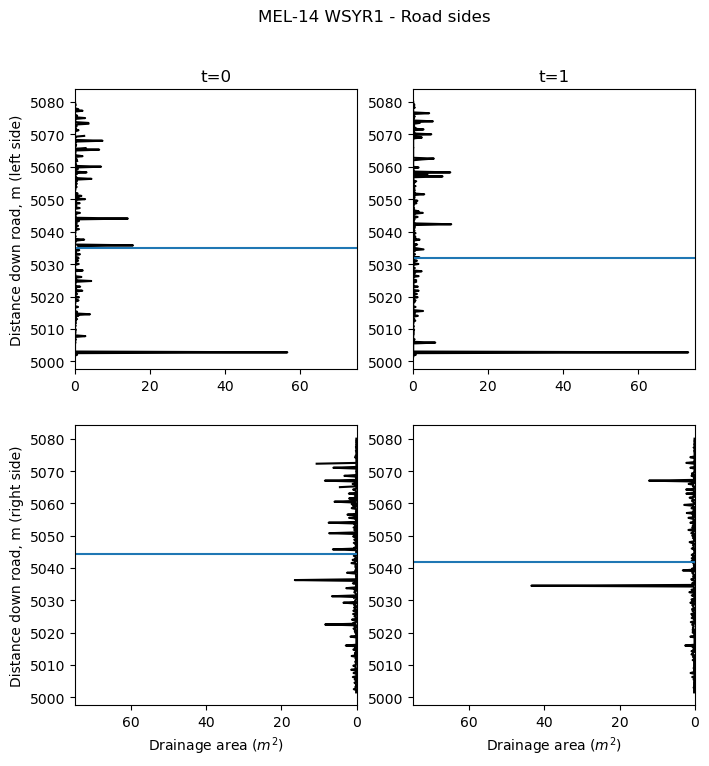

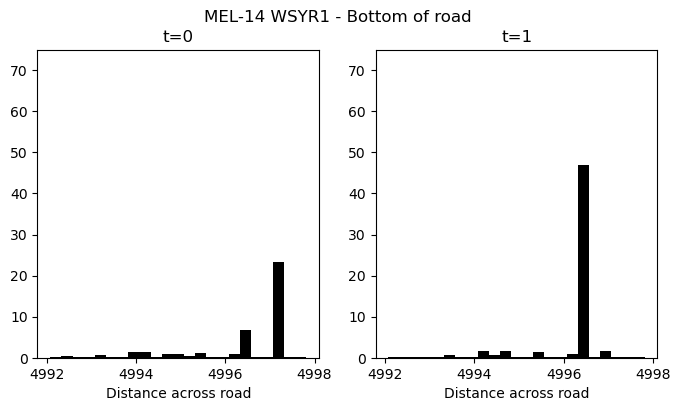

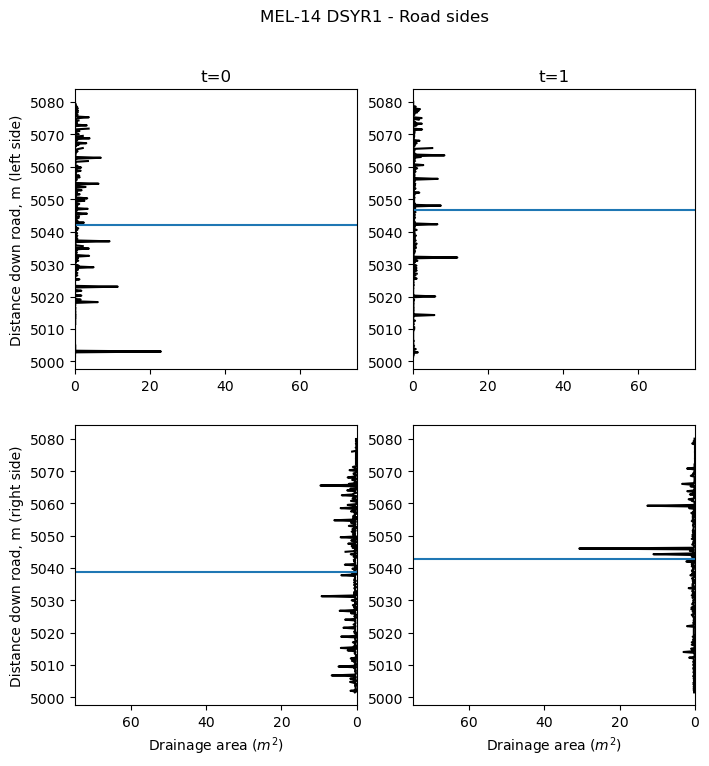

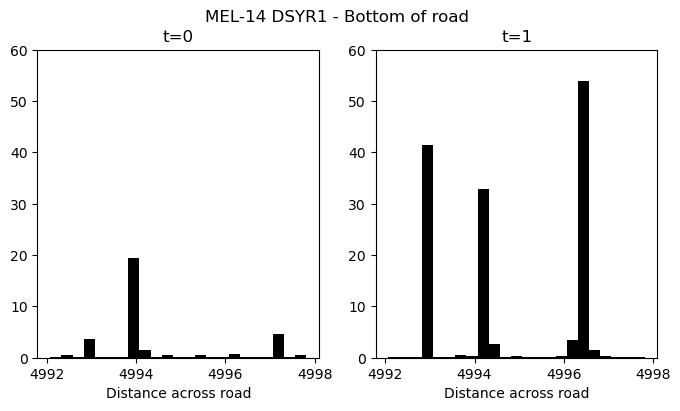

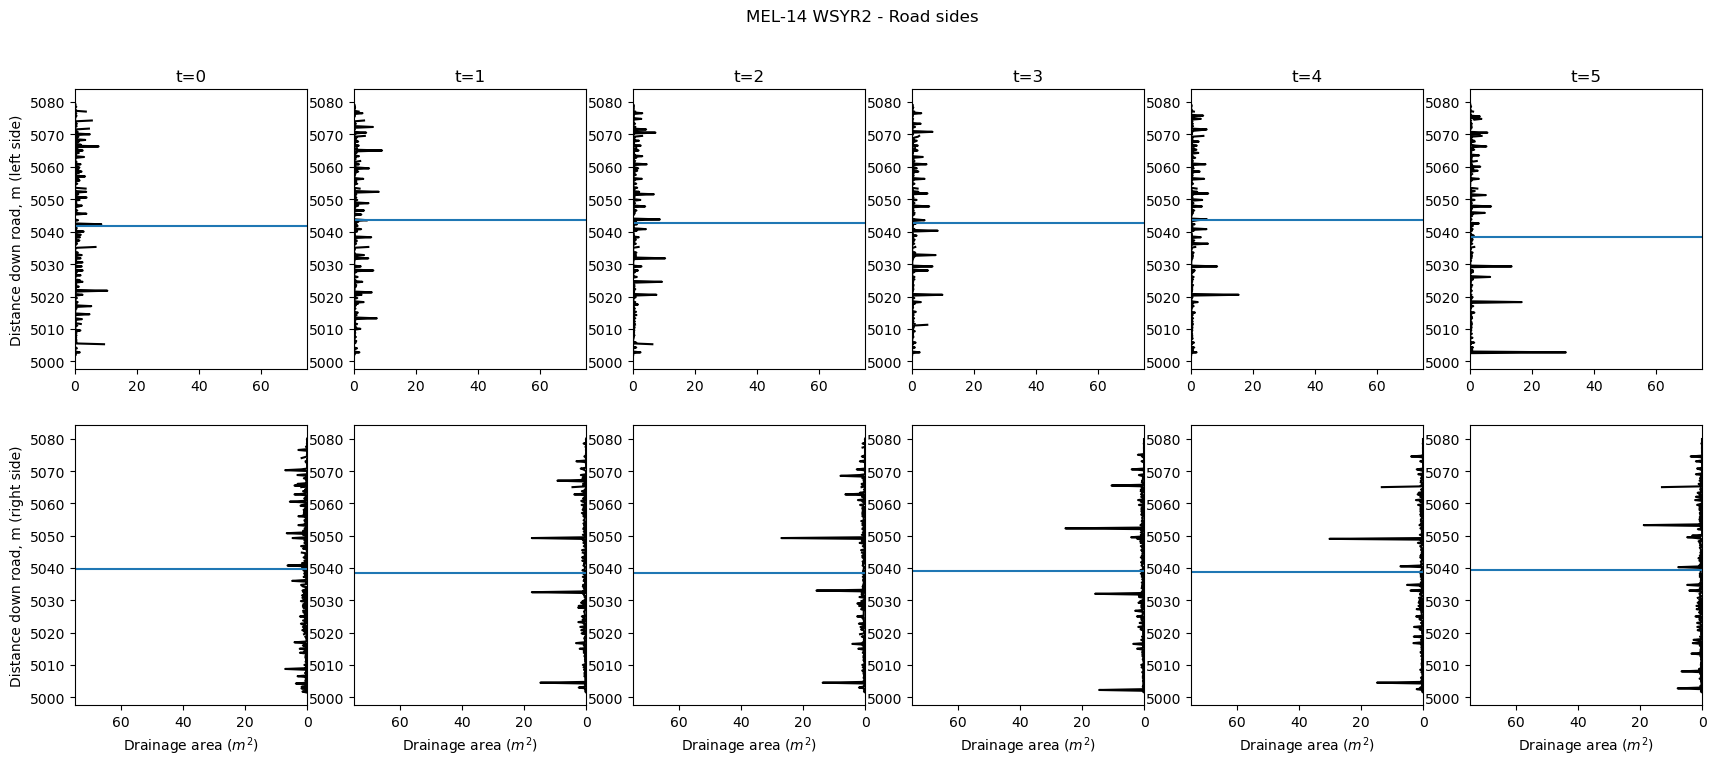

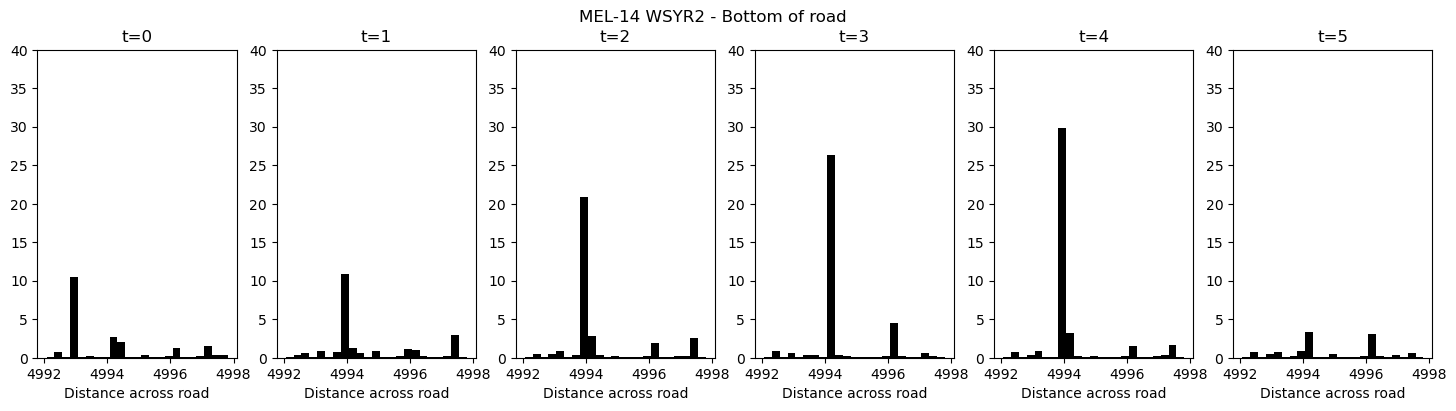

In [288]:
#WSYR1
fig0, ax = plt.subplots(2, 2, figsize=(8,8))
fig0.suptitle('MEL-14 WSYR1 - Road sides', x=0.5)
cgx_w = np.zeros(len(m14_wsyr1_dem_files))
cgx_e = np.zeros(len(m14_wsyr1_dem_files))
for i in range(len(m14_wsyr1_dem_files)):
    cgx_w[i] = np.sum((m14_wsyr1_west[i].values[~np.isnan(m14_wsyr1_west[i])]*m14_wsyr1_west[i]['y']))/np.sum(m14_wsyr1_west[i].values[~np.isnan(m14_wsyr1_west[i])])
    ax[0, i].plot(m14_wsyr1_west[i].values, m14_wsyr1_west[i]['y'], color='k')
    ax[0,i].plot([0,75], [cgx_w[i],cgx_w[i]])
  
    cgx_e[i] = np.sum((m14_wsyr1_east[i].values[~np.isnan(m14_wsyr1_east[i])]*m14_wsyr1_east[i]['y']))/np.sum(m14_wsyr1_east[i].values[~np.isnan(m14_wsyr1_east[i])])
    ax[1, i].plot(m14_wsyr1_east[i].values, m14_wsyr1_east[i]['y'], color='k')
    ax[1, i].plot([0,75], [cgx_e[i],cgx_e[i]])

    ax[0, i].set_title('t=%i' %i)
    ax[0, 0].set_ylabel('Distance down road, m (left side)')
    ax[1, 0].set_ylabel('Distance down road, m (right side)')
    ax[0, i].set_xlim(0,75)
    ax[1, i].set_xlim(0,75)
    ax[1, i].set_xlabel('Drainage area ($m^2$)')
    ax[1, i].invert_xaxis()

fig1, ax = plt.subplots(1, 2, figsize=(8,4))
fig1.suptitle('MEL-14 WSYR1 - Bottom of road', x=0.5)
for i in range(len(m14_wsyr1_dem_files)):
    ax[i].bar(m14_wsyr1_south[i]['x'], m14_wsyr1_south[i].values[0], width = 0.25, color='k')
    ax[i].set_ylim(0,75)
    ax[i].set_title('t=%i' %i)
    ax[i].set_xlabel('Distance across road')

#DSYR1
fig0, ax = plt.subplots(2, 2, figsize=(8,8))
fig0.suptitle('MEL-14 DSYR1 - Road sides', x=0.5)
cgx_w = np.zeros(len(m14_dsyr1_dem_files))
cgx_e = np.zeros(len(m14_dsyr1_dem_files))
for i in range(len(m14_dsyr1_dem_files)):
    cgx_w[i] = np.sum((m14_dsyr1_west[i].values[~np.isnan(m14_dsyr1_west[i])]*m14_dsyr1_west[i]['y']))/np.sum(m14_dsyr1_west[i].values[~np.isnan(m14_dsyr1_west[i])])
    ax[0, i].plot(m14_dsyr1_west[i].values, m14_dsyr1_west[i]['y'], color='k')
    ax[0,i].plot([0,75], [cgx_w[i],cgx_w[i]])
  
    cgx_e[i] = np.sum((m14_dsyr1_east[i].values[~np.isnan(m14_dsyr1_east[i])]*m14_dsyr1_east[i]['y']))/np.sum(m14_dsyr1_east[i].values[~np.isnan(m14_dsyr1_east[i])])
    ax[1, i].plot(m14_dsyr1_east[i].values, m14_dsyr1_east[i]['y'], color='k')
    ax[1, i].plot([0,75], [cgx_e[i],cgx_e[i]])

    ax[0, i].set_title('t=%i' %i)
    ax[0, 0].set_ylabel('Distance down road, m (left side)')
    ax[1, 0].set_ylabel('Distance down road, m (right side)')
    ax[0, i].set_xlim(0,75)
    ax[1, i].set_xlim(0,75)
    ax[1, i].set_xlabel('Drainage area ($m^2$)')
    ax[1, i].invert_xaxis()

fig1, ax = plt.subplots(1, 2, figsize=(8,4))
fig1.suptitle('MEL-14 DSYR1 - Bottom of road', x=0.5)
for i in range(len(m14_dsyr1_dem_files)):
    ax[i].bar(m14_dsyr1_south[i]['x'], m14_dsyr1_south[i].values[0], width = 0.25, color='k')
    ax[i].set_ylim(0,60)
    ax[i].set_title('t=%i' %i)
    ax[i].set_xlabel('Distance across road')


#WSYR2
fig0, ax = plt.subplots(2, 6, figsize=(21,8))
fig0.suptitle('MEL-14 WSYR2 - Road sides', x=0.5)
cgx_w = np.zeros(len(m14_wsyr2_dem_files))
cgx_e = np.zeros(len(m14_wsyr2_dem_files))
for i in range(len(m14_wsyr2_dem_files)):
    cgx_w[i] = np.sum((m14_wsyr2_west[i].values[~np.isnan(m14_wsyr2_west[i])]*m14_wsyr2_west[i]['y']))/np.sum(m14_wsyr2_west[i].values[~np.isnan(m14_wsyr2_west[i])])
    ax[0, i].plot(m14_wsyr2_west[i].values, m14_wsyr2_west[i]['y'], color='k')
    ax[0,i].plot([0,75], [cgx_w[i],cgx_w[i]])
  
    cgx_e[i] = np.sum((m14_wsyr2_east[i].values[~np.isnan(m14_wsyr2_east[i])]*m14_wsyr2_east[i]['y']))/np.sum(m14_wsyr2_east[i].values[~np.isnan(m14_wsyr2_east[i])])
    ax[1, i].plot(m14_wsyr2_east[i].values, m14_wsyr2_east[i]['y'], color='k')
    ax[1, i].plot([0,75], [cgx_e[i],cgx_e[i]])

    ax[0, i].set_title('t=%i' %i)
    ax[0, 0].set_ylabel('Distance down road, m (left side)')
    ax[1, 0].set_ylabel('Distance down road, m (right side)')
    ax[0, i].set_xlim(0,75)
    ax[1, i].set_xlim(0,75)
    ax[1, i].set_xlabel('Drainage area ($m^2$)')
    ax[1, i].invert_xaxis()

fig1, ax = plt.subplots(1, 6, figsize=(18,4))
fig1.suptitle('MEL-14 WSYR2 - Bottom of road', x=0.5)
for i in range(len(m14_wsyr2_dem_files)):
    ax[i].bar(m14_wsyr2_south[i]['x'], m14_wsyr2_south[i].values[0], width = 0.25, color='k')
    ax[i].set_ylim(0,40)
    ax[i].set_title('t=%i' %i)
    ax[i].set_xlabel('Distance across road')